In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [2]:
# mean, median, mode
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
np.mean(df['total_bill'])

19.785942622950824

In [5]:
np.median(df['total_bill'])

17.795

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

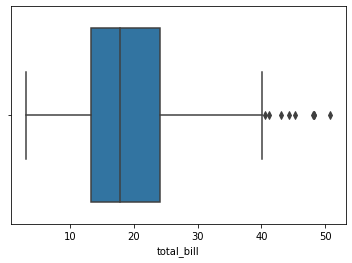

In [6]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

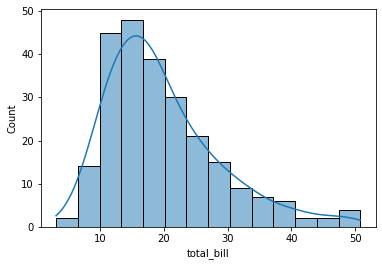

In [7]:
sns.histplot(df["total_bill"], kde="True")

In [8]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [9]:
dfAfterOutlierRemover = remove_outlier_IQR(df.total_bill)

In [10]:
dfAfterOutlierRemover.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

/home/shubham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

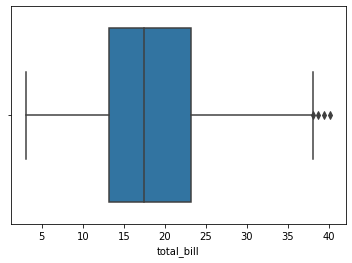

In [11]:
sns.boxplot(dfAfterOutlierRemover)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

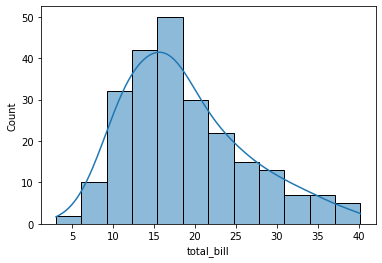

In [12]:
sns.histplot(dfAfterOutlierRemover, kde="True")

In [13]:
## Z-score and outlier
data = [11,12,15,29,16,18,41,12,12,10,74,30,131,36,13,38,0,45,-100,278,12,358]

In [14]:
outliers = []
def detect_outlier(dataset):
    threshold = 2  # for 2 std deviation
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for x in dataset:
        z_score = (x - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

In [15]:
detect_outlier(data)

[278, 358]

In [16]:
## IQR(Inter quartile range) = Q3 - Q1 where Q1 is 25 percentile and Q3 is 75 percentile

# 1. Sort the data
# 2. calculate Q1 and Q3
# 3. find IQR
# 4. find lower fence = Q1 - 1.5(IQR)
# 5. find upper fence = Q3 + 1.5(IQR)

dataset = sorted(data)
dataset

[-100,
 0,
 10,
 11,
 12,
 12,
 12,
 12,
 13,
 15,
 16,
 18,
 29,
 30,
 36,
 38,
 41,
 45,
 74,
 131,
 278,
 358]

In [17]:
q1, q3 = np.percentile(dataset, [25, 75])
print(q1, q3)

12.0 40.25


In [18]:
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
lower_fence

-30.375

In [19]:
upper_fence = q3 + (1.5 * iqr)
upper_fence

82.625